<a href="https://colab.research.google.com/github/ssvadla/Research_01/blob/main/Semi_Supervised_Light_Mixed_AllData_thresh_UL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

Mounted at /content/drive


,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [ ]:
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  print(i)
  train = train.append(i)



      Unnamed: 0                                           Sentence    Target
0            659  Appellant had stated to the officers that she ...   Invalid
1           3456  We shall discuss the facts more fully in conne...    Others
2           2043  â€œPerjury is a false statement, either writte...   Invalid
3           3344  The offense is felony theft by false pretext; ...     Issue
4           3231  Numerous contentions urging the commission of ...     Issue
...          ...                                                ...       ...
3471        1561  Therefore, the deletion of reference to the Cl...  Analysis
3472         327  A paraffin test, which was made on the appella...  Analysis
3473        1462  The sole question presented is the sufficiency...     Facts
3474        1169  The answer was in response to the question ask...     Facts
3475        1470  The Stateâ€™s evidence shows that in the sprin...   Invalid

[3476 rows x 3 columns]
      Unnamed: 0                       

In [ ]:
train.sort_values("Sentence", inplace = True)
print(len(train))


37711


In [ ]:
 new_train = train.drop_duplicates(subset ="Sentence")


In [ ]:
train = new_train

In [ ]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Others',
       'Conclusion', 'Issue'], dtype=object)

In [ ]:
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()


array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [ ]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [ ]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=660 (14.946%)
Class=5, n=332 (7.518%)
Class=2, n=2253 (51.019%)
Class=0, n=677 (15.331%)
Class=1, n=225 (5.095%)
Class=4, n=269 (6.091%)


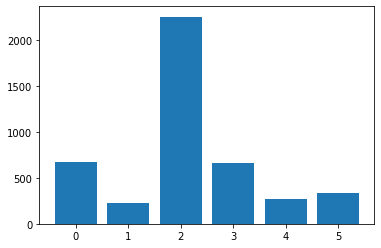

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [ ]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,1030,104,1042,1044,105,10511,1056,1065,107,107c,1081,1084,1097,1099,10a,10acre,11,110,1102,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.111629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=Analysis, n=677 (18.482%)
Class=Conclusion, n=225 (6.143%)
Class=Facts, n=1500 (40.950%)
Class=Invalid, n=660 (18.018%)
Class=Issue, n=269 (7.344%)
Class=Rule/Law/Holding, n=332 (9.064%)


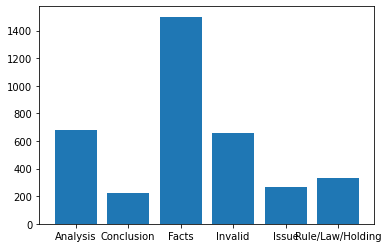

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#undersampling_Dict={'Facts': 550, 'Invalid': 218, 'Analysis': 520, 'Rule/Law/Holding': 1000, 'Issue': 179, 'Conclusion': 240}
undersampling_Dict={ 'Facts': 1500}
oversample = SMOTE("minority")
undersample = RandomUnderSampler(sampling_strategy=undersampling_Dict,random_state=42)
#X, y = oversample.fit_sample(X_tfidf_df, train['Target'])
X, y = undersample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Analysis, n=1500 (16.667%)
Class=Conclusion, n=1500 (16.667%)
Class=Facts, n=1500 (16.667%)
Class=Invalid, n=1500 (16.667%)
Class=Issue, n=1500 (16.667%)
Class=Rule/Law/Holding, n=1500 (16.667%)


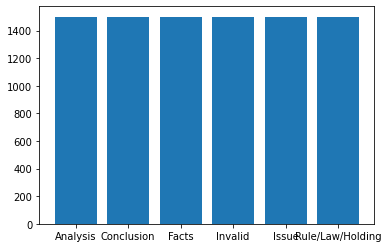

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=20)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn import svm


#X, y = make_classification(random_state=1)
counter = Counter(y)
print(counter)
#X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.26,random_state=42)
X_train, x_val, Y_train, y_val = train_test_split(X,y,test_size=0.20,random_state=42)
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_val)
#print(np.unique(y_pred))
#print(type(y_pred))

Accuracy_score = accuracy_score(y_pred,y_val)

print('Validation Accuracy_score: %f' % Accuracy_score)
test_pred = classifier.predict(t_p)
acc_test = accuracy_score(test_pred,test['Target'])
print('Accuracy test data', acc_test)
classification_report = classification_report(test_pred,test['Target'],digits=4)
print(classification_report)
matrix = confusion_matrix(y_pred, y_val)
print(matrix)


Counter({'Analysis': 1500, 'Conclusion': 1500, 'Facts': 1500, 'Invalid': 1500, 'Issue': 1500, 'Rule/Law/Holding': 1500})
Validation Accuracy_score: 0.851709
Accuracy test data 0.6257197696737045
                  precision    recall  f1-score   support

        Analysis     0.3896    0.4054    0.3974        74
      Conclusion     0.7692    0.6452    0.7018        31
           Facts     0.7041    0.7611    0.7315       247
         Invalid     0.6145    0.4359    0.5100       117
           Issue     0.4706    0.8421    0.6038        19
Rule/Law/Holding     0.6176    0.6364    0.6269        33

        accuracy                         0.6257       521
       macro avg     0.5943    0.6210    0.5952       521
    weighted avg     0.6292    0.6257    0.6213       521

[[319   7  25  23   8   3]
 [  9 363   8   3   1   1]
 [ 44   2 295  40   6   7]
 [ 28   5  46 318   5  15]
 [  1   4   3   6 351   3]
 [ 12   0   9  10  13 347]]


In [ ]:
Threshold = 0.97
unlabel_size = 191000

In [ ]:

unlabel = pd.read_csv(r'/content/drive/My Drive/Research/Unlabeled_data.csv')
#unlabel.head()

del unlabel['Complete']
del unlabel['Unnamed: 0']

unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

unlabel_1 = unlabel.loc[:unlabel_size]

def index_reset(unlabel_2):
  unlabel_2.reset_index(inplace=True)
  del unlabel_2['index']
  #print(unlabel_2.head())
  return unlabel_2

unlabel_1 = index_reset(unlabel_1)

x_un1 = tfidf_vect.transform(unlabel_1['text'])

x_un1.shape
pred_unlabel_1 = classifier.predict_proba(x_un1)
pred_unlabel_1

x_un1.shape

import numpy as np
pos=[]
large=[]
ind = []
i=0
for j in pred_unlabel_1:
  if max(j)> Threshold:
    ind.append(np.argmax(j))
    large.append(max(j))
    pos.append(i)
  i+=1


print(ind)
print(large)
print(pos)
print(type(pos))
print(len(ind))
print(len(large))
print(len(pos))

unlabel_1 = unlabel_1.loc[pos,:]
train_data_size = len(unlabel_1)
print(len(unlabel_1))
#unlabel_1.head()

class_x_un1 = tfidf_vect.transform(unlabel_1['text'])

class_x_un1.shape


class_pred_unlabel_1 = classifier.predict(class_x_un1)
class_pred_unlabel_1


unlabel_1['Target']=class_pred_unlabel_1
#unlabel_1.head()

train = train.rename(columns={'Sentence':'text'})
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)

print("#######3train len",len(train))
print("UL ",len(unlabel_1))
print("train_1",len(train_1))
total_train = len(train_1)

del train
del unlabel_1
del unlabel





[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[2, 5, 1, 5, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 5, 3, 3, 3, 3, 0, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 5, 3, 5, 1, 4, 1, 5, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 0, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 5, 3, 3, 1, 1, 1, 5, 3, 2, 2, 2, 1, 1, 3, 5, 1, 4, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 1, 2, 1, 3, 1, 4, 2, 1, 1, 1, 5, 1, 2, 2, 0, 3, 1, 5, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 5, 1, 2, 1, 5, 1, 2, 5, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2,

In [ ]:
del frame_1

In [ ]:
del train1
del train2
del train3
del train4
del train5
del train6
del train7
del train8
del train9
del train10
del train_highKappa

In [ ]:
len(train_1)

10133

[3 3 5 ... 1 1 1]
[3 3 5 ... 1 1 1]
Class=3, n=1925 (18.997%)
Class=5, n=667 (6.582%)
Class=2, n=3154 (31.126%)
Class=0, n=827 (8.161%)
Class=1, n=3118 (30.771%)
Class=4, n=442 (4.362%)


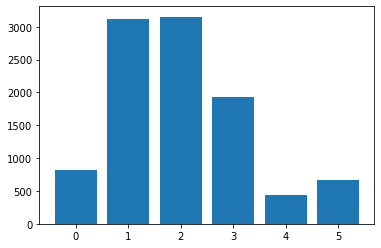

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train_1.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_1['text'])
print(X_tfidf.shape)

(10133, 9798)


In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,00,015,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,103,1030,1036,104,1042,1044,1047,105,10511,1056,106,1065,107,107c,1081,1084,1097,1099,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.124304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_tfidf_df.shape

(10133, 9798)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=Analysis, n=677 (18.482%)
Class=Conclusion, n=225 (6.143%)
Class=Facts, n=1500 (40.950%)
Class=Invalid, n=660 (18.018%)
Class=Issue, n=269 (7.344%)
Class=Rule/Law/Holding, n=332 (9.064%)


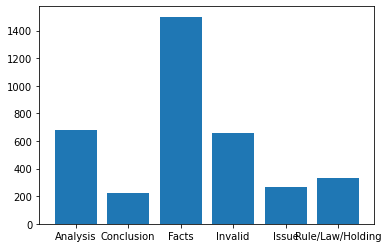

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#undersampling_Dict={'Facts': 550, 'Invalid': 218, 'Analysis': 520, 'Rule/Law/Holding': 1000, 'Issue': 179, 'Conclusion': 240}
undersampling_Dict={ 'Facts': 1500}
oversample = SMOTE("minority")
undersample = RandomUnderSampler(sampling_strategy=undersampling_Dict,random_state=42)
#X, y = oversample.fit_sample(X_tfidf_df, train['Target'])
X, y = undersample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Analysis, n=1500 (16.667%)
Class=Conclusion, n=1500 (16.667%)
Class=Facts, n=1500 (16.667%)
Class=Invalid, n=1500 (16.667%)
Class=Issue, n=1500 (16.667%)
Class=Rule/Law/Holding, n=1500 (16.667%)


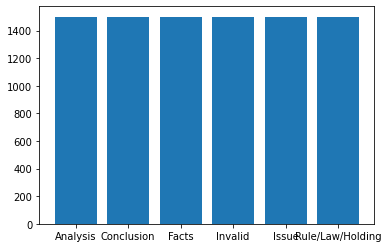

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=20)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()